# PH2102 Electromagnetism

## Numerical methods and computation with Python
### Lesson 1

In [ ]:
# package(s) installation

import sys
!{sys.executable} -m pip install ipywidgets numdifftools

In [1]:
# preamble

%matplotlib inline
from scipy import *
import numdifftools as nd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interact, FloatSlider

## 1. Mathematical Preliminaries<a name="mathprelims"></a>

### A. dot & cross products<a name="dotcross"></a>

The dot and cross products are 2 basic operations necessary in vector algebra. Their implementation in python is simple enough with the use of the ever helpful `scipy` library.

Let us start with simple 2-dimensional vectors $\vec{A}$ and $\vec{B}$,<br/>
where $\vec{A} = 1\hat{x} + 0\hat{y}$ and $\vec{B}$ is left to be defined by the user.

Run the code in the following cell.

In [9]:
def interact_vec():

    def plot_vec(x,y):
        
        ## defining variables
        origin = [0], [0]
        A = [1, 0]
        B = [x, y]
        
        ## dot product
        C = dot(B, A)
        print('The dot product between vectors A and B is', C)
        
        ## Set plot axes, etc.
        plt.xlim(-11, 11)
        plt.ylim(-11, 11)
        plt.xticks(arange(-10, 11, step=5))
        plt.yticks(arange(-10, 11, step=5))
        plt.title(r"Vectors")
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
        
        ## plotting
        plt.quiver(*origin, A[0], A[1], color='r', scale=10)
        plt.quiver(*origin, B[0], B[1], color='g', scale=10)
    
    ## interactive slider
    interact(plot_vec, x=FloatSlider(min=-3., max=3., step=0.1, value=1., continuous_update=False, description=r'x value of $\vec{B}$')
            , y=FloatSlider(min=-3., max=3., step=0.1, value=1., continuous_update=False, description=r'y value of $\vec{B}$'))

interact_vec();

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='x value of $\\vec{B}$', max…

Look at the code in the previous cell again. Can you identify where we have made used of `scipy`'s `dot` function for the calculation of dot products between 2 vectors? It should be easy to check that the returned value of the `dot` function in the above 2-dimensional case is correct. This is then easily extendable to a 3-dimensional case without loss of information.

Similarly, the cross product can be determined using `cross` function from `scipy` library. In the example cell below, set different values for $\vec{B}$ given $\vec{A} = 2\hat{x} + 0\hat{y} + 0\hat{z}$ and observe their cross product.

In [11]:
def interact_vec():
    ## Parameters
    camz, camera_angle = 20., 60.

    def plot_vec(x,y,z):
        
        ## defining variables
        origin = [0], [0], [0]
        A = [2, 0, 0]
        B = [x, y, z]
        
        ## cross product
        C = cross(A, B)
        print('Vector A cross B is', C)
        
        ## Set plot axes, etc.
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.set_xlim3d(-5, 5)
        ax.set_ylim3d(-5, 5)
        ax.set_zlim3d(-5, 5)
        ax.view_init(elev=camz, azim=camera_angle)
        ax.set_title(r"Vectors")
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$z$')
        
        ##plotting
        ax.quiver(*origin, A[0], A[1], A[2], color="r")
        ax.quiver(*origin, B[0], B[1], B[2], color="g")
        ax.quiver(*origin, C[0], C[1], C[2], color="b")
        
    interact(plot_vec, x=FloatSlider(min=-5., max=5., step=0.1, value=1., continuous_update=False, description=r'x value of $\vec{B}$')
            , y=FloatSlider(min=-5., max=5., step=0.1, value=1., continuous_update=False, description=r'y value of $\vec{B}$')
            , z=FloatSlider(min=-5., max=5., step=0.1, value=1., continuous_update=False, description=r'z value of $\vec{B}$'))

interact_vec();

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='x value of $\\vec{B}$', max…

Exercise 1) Prove, in the cell below, the __vector triple product__ rule i.e. $\vec{A} \times (\vec{B} \times \vec{C}) = \vec{B}(\vec{A} \cdot \vec{C}) - \vec{C}(\vec{A} \cdot \vec{B})$ given the values of $\vec{A}, \vec{B}$ and $\vec{C}$.

_*Hint: Evaluate and compare LHS with RHS._

In [28]:
A = array([2, 0, 0])
B = array([0, 2, 0])
C = array([1, 1, 1])

## edit your code here

Exercise 2) Let us try to retrieve the angle $\theta$ formed by 2 vectors $\vec{A}$ and $\vec{B}$ in $R^3$ space, given the values of $\vec{A}$ and $\vec{B}$. Implement your code in the cell below.

_*Hint: recall $\vec{v}\cdot\vec{v}=|v|^2$ and $\vec{A}\cdot\vec{B}=|A||B|cos\theta$._

In [32]:
A = array([1, 0, 0])
B = array([-1, 0, 0])

## get magnitude of a vector

## get the angle theta between 2 vectors

### B. 3D coordinate systems<a name="convert"></a>

Often times, it is handy to describe the geometry of a particular system in coordinates that allows for exploitation of its symmetry. The following cells demonstrates some simple functions that convert between cartesian, cylindrical and spherical coordinates.

#### Cartesian - Cylindrical

In [33]:
## s is a cartesian coordinate given by [x,y,z]
def cart2cyl(s):
    rho = sqrt(s[0]**2 + s[1]**2)
    phi = arctan2(s[1], s[0])
    z = s[2]

    return [rho, phi, z]

## s is a cylindrical coordinate given by [rho,phi,z]
def cyl2cart(s):
    x = s[0] * cos(s[1])
    y = s[0] * sin(s[1])
    z = s[2]

    return [x, y, z]

#### Cartesian - Spherical
Exercise 3) Write 2 functions in the cell below that accomplish the conversion from cartesian to spherical coordinates and vice versa.

In [ ]:
## s is a cartesian coordinate given by [x,y,z]
def cart2sph(s):
    ## edit your code here
    #return [r, theta, phi]

## s is a spherical coordinate given by [r,theta,phi]
def sph2cart(s):
    ## edit your code here
    #return [x, y, z]

### C. Fields and differential calculus<a name="vecfields"></a>

Now that we have become familiar with vectors, we turn our attention to vector fields. When dealing with vector fields, there are a couple of differential operations we can perform, namely: gradient, divergence and curl.

#### Gradient<a name="grad"></a>

`gradient` from `scipy` library returns the gradient of a scalar function, which is itself a vector field. The cell below demonstrates a simple example of computing the gradient of an arbitrary scalar field, and its plot visualisation using `matplotlib`'s `quiver`function. 

Additionally, note the usage of `scipy`'s `meshgrid` to create the 2-dimensional grid points. We also make used of the `contour` function from `matplotlib` library to plot the scalar function, very much analogous to a topographic map. 

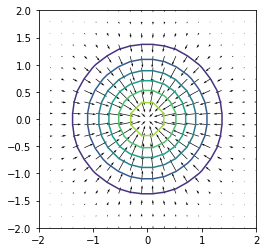

In [72]:
## set up the co-ordinates
x = linspace(-2., 2., 20)
y = linspace(-2., 2., 20)
X, Y = meshgrid(x, y)

## an arbitrary scalar function
Z = exp(-X**2 - Y**2)

## gradient of scalar field
gy, gx = gradient(Z) 
# Indexing is ordered left to right (rows followed by columns). 
# Thus the y-axis gradient (evaluated across rows) is returned first.

## setting up plot
plt.gca().set_aspect('equal', adjustable='box')

## plotting the gradient (which is a vector field)
plt.contour(X, Y, Z) # scalar function
plt.quiver(X, Y, gx, gy)

#### Divergence<a name="div"></a>

The divergence of a vector function is itself a scalar field, and its plot visualisation can be done using `matplotlib`'s `plot_surface`. Unfortunately, `scipy` does not have a built-in divergence function we can call. However, we can define our own divergence function based on the expression $\nabla \cdot \vec{V} = \frac{\partial V_{x}}{\partial x} + \frac{\partial V_{y}}{\partial y} + \frac{\partial V_{z}}{\partial z}$

Exercise 4) Write a `python` function that returns the divergence of an input vector field. _(challenging)_

In [ ]:
def divergence(f):
    """
    Computes and return a single array of the same shape as each of the items in f 
    i.e. the divergence of the vector field f, dFx/dx + dFy/dy + ...
    
    f: List of arrays, where every item of the list is one dimension of the vector field
    """
    # edit your code here
    
    return div

Now that we have the user-defined `divergence` function, the cell below demonstrates a simple example of plot visualisation for divergence of an arbitrary vector field using `matplotlib`'s `plot_surface`.

In [ ]:
## set up the co-ordinates
x = linspace(-2., 2., 20)
y = linspace(-2., 2., 20)
X, Y = meshgrid(x, y)

## an arbitrary vector function
alpha = 3
r2 = X**2 + Y**2
Ax = exp(-r2/alpha**2)*X
Ay = exp(-r2/alpha**2)*Y

field = [Ax, Ay]
div = divergence(field)

## plot of vector function
plt.gca().set_aspect('equal', adjustable='box')
plt.quiver(X, Y, Ax, Ay)

## plotting the divergence (which is a scalar field)
ax = plt.figure().gca(projection = '3d')
ax.plot_surface(X, Y, div, cmap=cm.coolwarm, linewidth=1, antialiased='True')

#### Curl<a name="curl"></a>

The curl of a vector function is itself a vector field. Regrettably, `scipy` module also does not have a built-in curl function. Fortunately, we can define our own curl function based on the expression
$\nabla \times \vec{V} = \left(\frac{\partial V_{z}}{\partial y} - \frac{\partial V_{y}}{\partial z}\right)\hat{x} + \left(\frac{\partial V_{x}}{\partial z} - \frac{\partial V_{z}}{\partial x}\right)\hat{y} + \left(\frac{\partial V_{y}}{\partial x} - \frac{\partial V_{x}}{\partial y}\right)\hat{z}$

Exercise 5) Write a `python` function that returns the curl of an input vector field. _(challenging)_

_*Hint: explore the `Jacobian` function from `numdifftools` library. Check out the [online documentation](https://numdifftools.readthedocs.io/en/latest/reference/numdifftools.html#module-numdifftools.core). You need to have `numdifftools` library installed._

In [ ]:
def curl(f, x):
    # edit your code here
    return c

Now that we have the user-defined curl function, the cell below demonstrates a simple example of computing the curl of an arbitrary vortex vector field, and its plot visualisation using `matplotlib`'s `quiver`.

In [ ]:
## set up the co-ordinates
lx, ly, lz = 10, 10, 10
x = linspace(-2., 2., lx)
y = linspace(-2., 2., ly)
z = linspace(0., .1, lz)
X, Y, Z = meshgrid(x, y, z, indexing='ij')

## vortex vector field
def v1(x):
    return array([ exp((-x[0]**2 - x[1]**2)/9) * -x[1], exp((-x[0]**2 - x[1]**2)/9) * x[0], 0 ])

c_res = zeros((lx,ly,lz,3))
for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            r = array([ x[i], y[j], z[k] ])
            c = curl(v1, r)
            c_res[i,j,k,0] = c[0]
            c_res[i,j,k,1] = c[1]
            c_res[i,j,k,2] = c[2]

## plotting the curl (which is a vector field) at z=0 
ax = plt.figure().gca(projection = '3d')
ax.quiver(X[:,:,0], Y[:,:,0], Z[:,:,0], c_res[:,:,0,0], c_res[:,:,0,1], c_res[:,:,0,2], arrow_length_ratio=.3, length=.03)

In [ ]:
## plotting the vortex vector field
X, Y = meshgrid(x, y)

plt.gca().set_aspect('equal', adjustable='box')
plt.quiver(X, Y, v1([X,Y])[0], v1([X,Y])[1])

Question: Do you know why we call for a seperate 2D meshgrid for the vortex vector field plot?